# Term Paper, BAN436

Candidates: 140, 150 and 175

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas_datareader import data




# Task1

## a)

In [5]:
from pandas_datareader import wb

#countries =pdr.wb.country_codes

In [6]:
Emis = wb.download(indicator='EN.ATM.CO2E.KT', country=['all'], start=2018, end=2018)

Pop = wb.download(indicator='SP.POP.TOTL', country=['all'],start=2018, end=2018)

In [7]:

Pop_Regions = Pop.iloc[:48]
Emis_Regions = Emis.iloc[:48]
Pop = Pop.iloc[49:]
Emis = Emis.iloc[49:]

We download the data for emission and population and then we filter the data, so that we have datas with only countries and only regions seperately.

In [8]:

Emis.reset_index(inplace=True)
Pop.reset_index(inplace=True)

In [9]:
Emis = Emis.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':'Emission'}).copy()
Pop = Pop.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':'Population'}).copy()


Then we use the function reset_index() and rename() to clean and tidy the data for optimal use.

In [11]:
Emis_Pop = Emis.merge(Pop, on=['Country','Year'],how="outer")

In [12]:
Emis_Pop.dropna(axis=0,inplace=True)


Then we merge the two datasets on Country and Year, and then removing all N/A.

In [13]:
Emis_Pop["Emis_per_Cap"]=(Emis_Pop["Emission"]/Emis_Pop["Population"])

We create a new column with Emission per capita. 

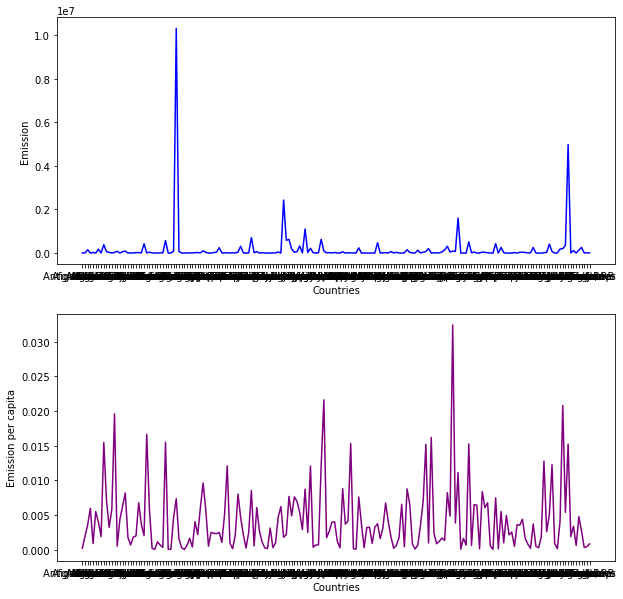

In [14]:

#Making plots for total and per capita emission.
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (10, 10))


ax[0].plot(Emis_Pop["Country"],Emis_Pop["Emission"],color="Blue")
ax[0].set_ylabel("Emission")
ax[0].set_xlabel("Countries")
ax[1].plot(Emis_Pop["Country"],Emis_Pop["Emis_per_Cap"],color="Purple")
ax[1].set_ylabel("Emission per capita")
ax[1].set_xlabel("Countries")

plt.savefig('data/AAPL_plot.png')



b)
We see from the graphs above that we do not observe the same pattern in per capital CO2 emissions as we do in total CO2.

From the first graph it looks like a handful countries are very bad when it comes to emissions and the rest are good. But when we look into the second graph we see that this is not the case. Per capita emission is much more even, and the big differences in the first graph is because some countries have huge population and therefore huge emissions.


In [100]:
Pop_Regions.reset_index(inplace=True)
Emis_Regions.reset_index(inplace=True)
Pop_Regions = Pop_Regions.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':'Population'}).copy()
Emis_Regions = Emis_Regions.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':'Emission'}).copy()
Emis_Pop_Regions = Emis_Regions.merge(Pop_Regions, on=['Country','Year'],how="outer")
Emis_Pop_Regions.dropna(axis=0,inplace=True)

Emis_Pop_Regions_HighIncome = Emis_Pop_Regions[Emis_Pop_Regions["Country"]=='High income']
Emis_Pop_Regions_LowIncome = Emis_Pop_Regions[Emis_Pop_Regions["Country"]=='Low income']
Emis_Pop_Regions_Income = Emis_Pop_Regions_HighIncome.append(Emis_Pop_Regions_LowIncome,ignore_index=True)
Emis_Pop_Regions_Income["Emis_per_Cap"] = (Emis_Pop_Regions_Income["Emission"]/Emis_Pop_Regions_Income["Population"])


Emis_Pop_Regions_Income

,Country,Year,Emission,Population,Emis_per_Cap
0,High income,2018,1.236637e+07,1.205942e+09,0.010255
1,Low income,2018,1.494137e+05,6.311472e+08,0.000237


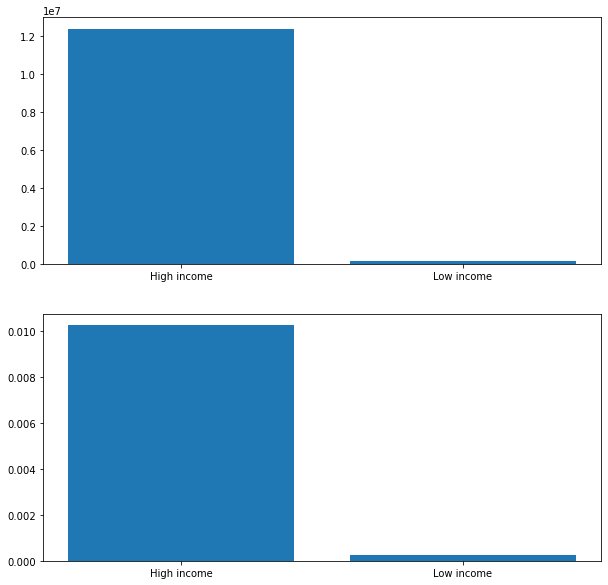

In [101]:
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (10, 10))

ax[0].bar(Emis_Pop_Regions_Income['Country'],Emis_Pop_Regions_Income["Emission"])
ax[1].bar(Emis_Pop_Regions_Income['Country'],Emis_Pop_Regions_Income["Emis_per_Cap"])


plt.show()

We see from this that High-Income countries have much larger CO2 emissions than low income countries. When compared to emissions per capita the results are the same. 

c)

We use: Renewable energy consumption,GDP, GDP growth, Unemployment, Access to electricity, Urban Population %.

In [10]:
Ren_Ene = wb.download(indicator='EG.FEC.RNEW.ZS', country=['all'], start=2018, end=2018)

GDP = wb.download(indicator='NY.GDP.MKTP.CD', country=['all'],start=2018, end=2018)

GDP_growth = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['all'],start=2018, end=2018)

Unempl = wb.download(indicator='SL.UEM.TOTL.ZS', country=['all'],start=2018, end=2018)

Elect = wb.download(indicator='EG.ELC.ACCS.ZS', country=['all'],start=2018, end=2018)

UrbPop = wb.download(indicator='SP.URB.TOTL.IN.ZS', country=['all'],start=2018, end=2018)



In [11]:
Liste = [Ren_Ene,GDP,GDP_growth,Unempl,Elect,UrbPop]
Liste2 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']
Liste3 =['EG.FEC.RNEW.ZS','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD.ZG','SL.UEM.TOTL.ZS','EG.ELC.ACCS.ZS','SP.URB.TOTL.IN.ZS']



In [12]:
def clean_datas(List,List2,Liste3):
    New_Liste = []
    for i in range(len(List)):
        List[i] = List[i].iloc[49:]
        List[i].reset_index(inplace=True)
        List[i] = List[i].rename(columns={'country':'Country','year':'Year',Liste3[i]:List2[i]}).copy()
        New_Liste.append(List[i])
    
    return New_Liste




In [13]:
All_Data = clean_datas(Liste,Liste2,Liste3)
All_Data

[                   Country  Year    Ren_Ene
 0              Afghanistan  2018  21.422701
 1                  Albania  2018  38.266399
 2                  Algeria  2018   0.193300
 3           American Samoa  2018   2.856600
 4                  Andorra  2018  18.506001
 ..                     ...   ...        ...
 212  Virgin Islands (U.S.)  2018   3.391800
 213     West Bank and Gaza  2018  12.729600
 214            Yemen, Rep.  2018   4.269000
 215                 Zambia  2018  85.104599
 216               Zimbabwe  2018  81.363602
 
 [217 rows x 3 columns],
                    Country  Year           GDP
 0              Afghanistan  2018  1.805323e+10
 1                  Albania  2018  1.515643e+10
 2                  Algeria  2018  1.749109e+11
 3           American Samoa  2018  6.390000e+08
 4                  Andorra  2018  3.218316e+09
 ..                     ...   ...           ...
 212  Virgin Islands (U.S.)  2018  3.900000e+09
 213     West Bank and Gaza  2018  1.627660e+10
 

In [14]:
for i in range(len(All_Data)-1):

    for j in range(2):
        All_Data[i+1].drop(All_Data[i+1].columns[0],axis=1,inplace=True)
All_Data


[                   Country  Year    Ren_Ene
 0              Afghanistan  2018  21.422701
 1                  Albania  2018  38.266399
 2                  Algeria  2018   0.193300
 3           American Samoa  2018   2.856600
 4                  Andorra  2018  18.506001
 ..                     ...   ...        ...
 212  Virgin Islands (U.S.)  2018   3.391800
 213     West Bank and Gaza  2018  12.729600
 214            Yemen, Rep.  2018   4.269000
 215                 Zambia  2018  85.104599
 216               Zimbabwe  2018  81.363602
 
 [217 rows x 3 columns],
               GDP
 0    1.805323e+10
 1    1.515643e+10
 2    1.749109e+11
 3    6.390000e+08
 4    3.218316e+09
 ..            ...
 212  3.900000e+09
 213  1.627660e+10
 214  2.160614e+10
 215  2.631159e+10
 216  1.811554e+10
 
 [217 rows x 1 columns],
      GDP_growth
 0      1.189228
 1      4.019360
 2      1.100000
 3      2.671119
 4      1.588765
 ..          ...
 212    1.587302
 213    1.227077
 214    0.752447
 215    

In [15]:
#Emis_Pop = Emis.merge(Pop, on=['Country','Year'],how="outer")
data6 = pd.concat(All_Data, axis=1)
data6

,Country,Year,Ren_Ene,GDP,GDP_growth,Unempl,Elect,UrbPop
0,Afghanistan,2018,21.422701,1.805323e+10,1.189228,11.06,98.715622,25.495
1,Albania,2018,38.266399,1.515643e+10,4.019360,12.30,100.000000,60.319
2,Algeria,2018,0.193300,1.749109e+11,1.100000,11.89,99.641922,72.629
3,American Samoa,2018,2.856600,6.390000e+08,2.671119,NaN,NaN,87.153
4,Andorra,2018,18.506001,3.218316e+09,1.588765,NaN,100.000000,88.062
...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),2018,3.391800,3.900000e+09,1.587302,7.99,100.000000,95.721
213,West Bank and Gaza,2018,12.729600,1.627660e+10,1.227077,26.26,99.990372,76.164
214,"Yemen, Rep.",2018,4.269000,2.160614e+10,0.752447,13.01,62.000000,36.642
215,Zambia,2018,85.104599,2.631159e+10,4.034494,12.01,39.822304,43.521


In [16]:
data6.dropna(axis=0,inplace=True)

data6

,Country,Year,Ren_Ene,GDP,GDP_growth,Unempl,Elect,UrbPop
0,Afghanistan,2018,21.422701,1.805323e+10,1.189228,11.06,98.715622,25.495
1,Albania,2018,38.266399,1.515643e+10,4.019360,12.30,100.000000,60.319
2,Algeria,2018,0.193300,1.749109e+11,1.100000,11.89,99.641922,72.629
5,Angola,2018,56.785500,1.013532e+11,-2.003630,7.00,45.290000,65.514
7,Argentina,2018,10.520800,5.248197e+11,-2.617396,9.22,100.000000,91.870
...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),2018,3.391800,3.900000e+09,1.587302,7.99,100.000000,95.721
213,West Bank and Gaza,2018,12.729600,1.627660e+10,1.227077,26.26,99.990372,76.164
214,"Yemen, Rep.",2018,4.269000,2.160614e+10,0.752447,13.01,62.000000,36.642
215,Zambia,2018,85.104599,2.631159e+10,4.034494,12.01,39.822304,43.521


In [17]:
data6_merge = data6.merge(Emis_Pop,on=['Country','Year'],how='outer')

data6_merge.dropna(axis=0,inplace=True)



In [18]:
correlation=data6_merge.corr()

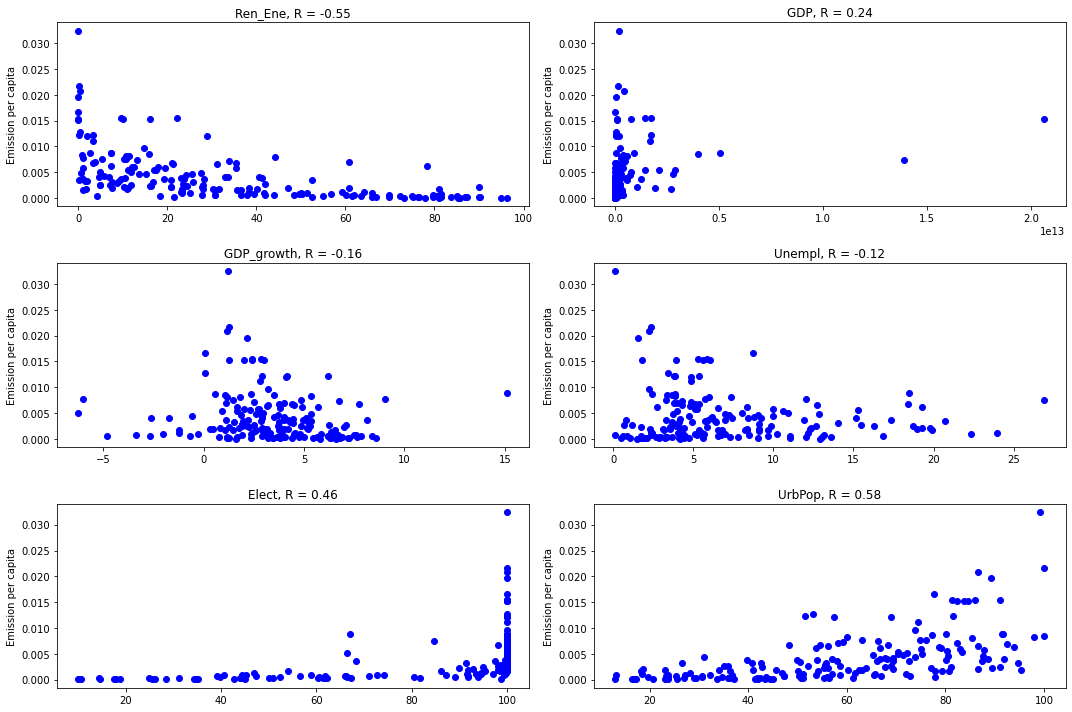

In [19]:
Liste4 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']

rows=3
cols=2
n=0
fig, ax = plt.subplots(nrows = rows,        # 2 rows
                       ncols = cols,        # 2 columns
                       figsize = (15, 10))

for i in range(rows):
    for j in range(cols):
        ax[i,j].scatter(data6_merge[Liste4[n]],data6_merge["Emis_per_Cap"],
                    color="blue")
        
        ax[i,j].set_title(Liste4[n]+", R = "+ str(round(correlation.loc['Emis_per_Cap', Liste4[n]], 2)))
        ax[i,j].set_ylabel("Emission per capita")
        
        fig.tight_layout()
    
        n+=1
        
plt.show()

In [20]:
import statsmodels.formula.api as smf



In [21]:
def get_model(formula, df):
    
    # create OLS model
    model = smf.ols(formula, data = df)

    # estimate model
    model = model.fit()
    
    return model

In [24]:
Liste4 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']

formula = 'Emis_per_Cap ~ Ren_Ene + GDP + GDP_growth + Unempl + Elect + UrbPop'

# estimate model
model = get_model(formula, data6_merge)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Emis_per_Cap   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     26.17
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           7.97e-22
Time:                        15:34:58   Log-Likelihood:                 735.96
No. Observations:                 174   AIC:                            -1458.
Df Residuals:                     167   BIC:                            -1436.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.002      1.938      0.054   -7.05e-05       0.008
Ren_Ene    -7.042e-05   1.48e-05     -4.769      0.000   -9.96e-05   -4.13e-05
GDP         2.542e-16   1.42e-16      1.788      0.076   -2.65e-17    5.35e-16
GDP_growth -8.361e-05      0.000     -0.809      0.419      -0.000       0.000
Unempl        -0.0002   5.35e-05     -3.568      0.000      -0.000   -8.52e-05
Elect      -8.549e-06   1.63e-05     -0.524      0.601   -4.08e-05    2.37e-05
UrbPop      8.569e-05   1.49e-05      5.770      0.000    5.64e-05       0.000
==============================================================================
Omnibus:                       89.213   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.228
Skew:                           1.881   Prob(JB):                    3.88e-104
Kurtosis:                      10.178   Cond. No.                     1.43e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

answer on c)
Are the 6 indicators good explanators of differences CO2 emissions between countries? 
Are the regression results impacted by outliers? Are there non-linearities in the relationship 
between emissions and some of the indicators? 

### d)

d)
Our indicators that explain most of the Co2 emission per capita is Renewable Energy, Unemployment and Urban population.


In [27]:
Li = ['Ren_Ene','Unempl','UrbPop']

formula = 'Emis_per_Cap ~ Ren_Ene + Unempl + UrbPop'

# estimate model
model = get_model(formula, data6_merge)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Emis_per_Cap   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     50.67
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.90e-23
Time:                        15:45:06   Log-Likelihood:                 733.87
No. Observations:                 174   AIC:                            -1460.
Df Residuals:                     170   BIC:                            -1447.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.001      2.247      0.026       0.000       0.005
Ren_Ene    -6.756e-05   1.13e-05     -5.958      0.000   -8.99e-05   -4.52e-05
Unempl        -0.0002   5.26e-05     -3.672      0.000      -0.000   -8.92e-05
UrbPop      8.863e-05    1.4e-05      6.348      0.000    6.11e-05       0.000
==============================================================================
Omnibus:                       84.644   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.514
Skew:                           1.798   Prob(JB):                     3.59e-91
Kurtosis:                       9.672   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Task 2

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas_datareader import data
from pandas_datareader import wb



In [124]:
#Need to write the country code of the country you want data from.
def getCountryData(country):
    Emis2 = wb.download(indicator='EN.ATM.CO2E.KT', country=[country], start=2000, end=2018)
    Emis2.reset_index(inplace=True)
    Emis2 = Emis2.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':"Emission"}).copy()

    Pop2 = wb.download(indicator='SP.POP.TOTL', country=[country],start=2000, end=2018)
    Pop2.reset_index(inplace=True)
    Pop2 = Pop2.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':"Population"}).copy()

    Emis2_Pop2 = Emis2.merge(Pop2, on=['Country','Year'],how="outer")
    
    Emis2_Pop2["Emis_per_Cap"] = (Emis2_Pop2["Emission"]/Emis2_Pop2["Population"])

    return Emis2_Pop2

country_code = (input("What country do you want to research? ps:write country code "))

EmisData = getCountryData(country_code)


What country do you want to research? ps:write country code CN


In [84]:
import pandas_datareader.data as web

# Only get the adjusted close.
SnP = web.DataReader("^GSPC", 
                       start='2000-1-1', 
                       end='2018-12-31', 
                       data_source='yahoo',
                    )

#['Adj Close']

SnP.reset_index(inplace=True)
SnP_close = SnP[['Date','Adj Close']]
SnP_close



,Date,Adj Close
0,2000-01-03,1455.219971
1,2000-01-04,1399.420044
2,2000-01-05,1402.109985
3,2000-01-06,1403.449951
4,2000-01-07,1441.469971
...,...,...
4774,2018-12-24,2351.100098
4775,2018-12-26,2467.699951
4776,2018-12-27,2488.830078
4777,2018-12-28,2485.739990


In [82]:
plt.style.use('default')

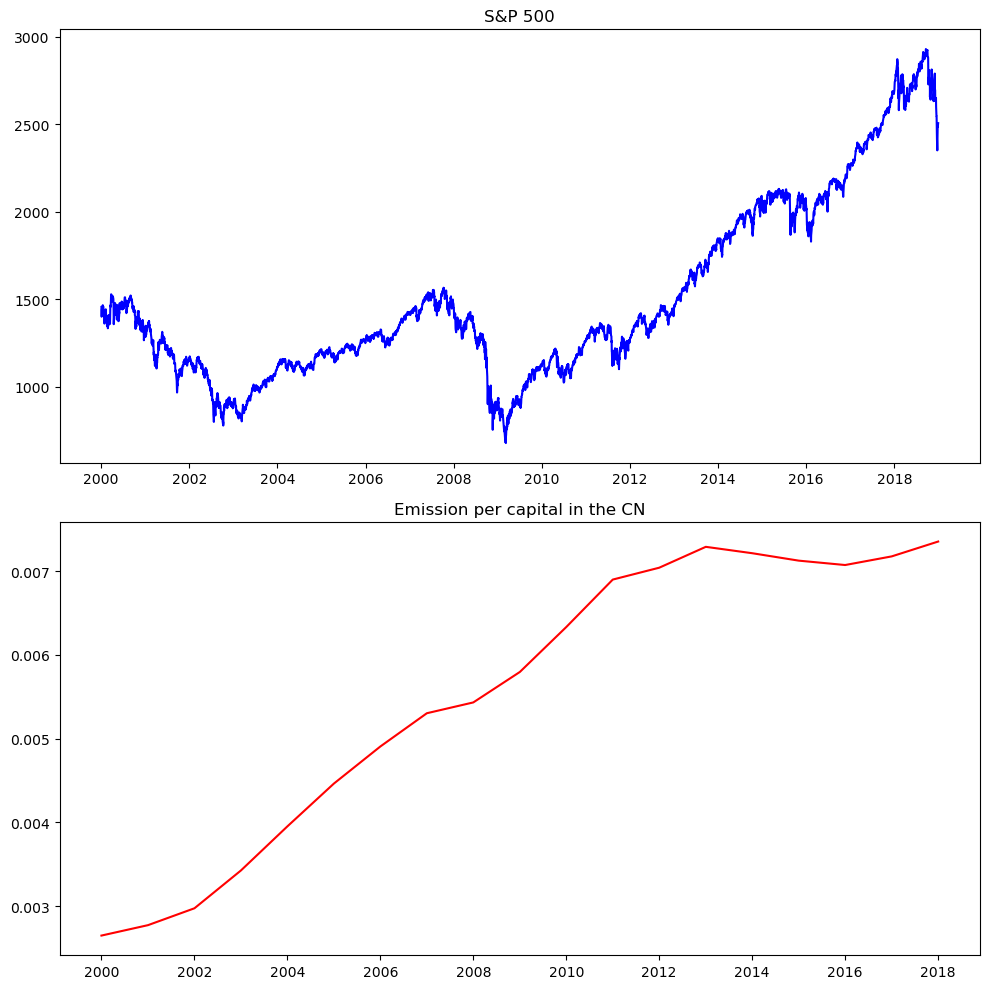

In [126]:
SnP['Date']=pd.to_datetime(SnP['Date'])
EmisData['Year']=pd.to_datetime(EmisData['Year'])
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].plot(SnP['Date'],
           SnP['Adj Close'],
      color="blue")

ax[1].plot(EmisData['Year'],
           EmisData["Emis_per_Cap"],
       color="red")

ax[0].set_title("S&P 500")
ax[1].set_title("Emission per capital in the "+ country_code)
fig.tight_layout()

plt.show()